Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('AirPassengers.csv') # считываем датасет
df.columns = (['Month','Pass']) # заменяем название столбца '#Passenger' на 'Pass' чтобы избежать путаницы с комментариями
df.head() # смотрим на первые несколько строчек

,Month,Pass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['Month'])) 
df.head() # смотрим на результат

,Month,Pass
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [13]:
 # замечаем, что т.к. у нас теперь есть индекс Month, нам больше не нужен столбец Month, который его дублирует
df.drop(['Month'], axis = 1, inplace = True)
df.head() # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


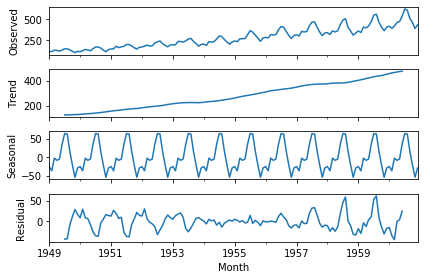

In [14]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.show() # любуемся результатом

In [16]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [17]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

,Pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [18]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

,Pass
Month,
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN
1960-11-01,NaN
1960-12-01,NaN


In [19]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

,Pass
Month,
1949-07-01,-42.622475
1949-08-01,-42.073232
1949-09-01,-8.478535
1949-10-01,11.059343
1949-11-01,28.593434


Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности

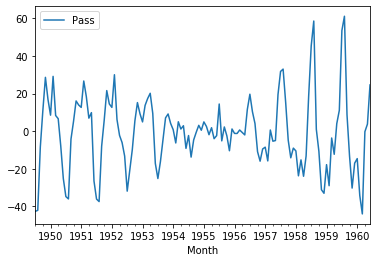

In [20]:
residual_part.plot()
pyplot.show() # любуемся результатом